**IMPORTING AND SETTING UP THE NECESSARY DEPENDENCIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow.keras.initializers as initializers
from tensorflow.keras.models import load_model

**DATA LOADING AND PREPROCESSING**

In [ ]:
data_f=pd.read_csv(File_Path)

In [ ]:
data_f.shape

(2013, 7)

In [ ]:
data_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-25,26.250000,26.412500,26.127501,26.270000,24.015160,112126400
1,2016-04-26,25.977501,26.325001,25.977501,26.087500,23.848322,224064800
2,2016-04-27,24.000000,24.677500,23.920000,24.455000,22.355942,458408400
3,2016-04-28,24.402500,24.469999,23.562500,23.707500,21.672598,328970800
4,2016-04-29,23.497499,23.680000,23.127501,23.434999,21.423492,274126000


In [ ]:
data_f['Date']=pd.to_datetime(data_f.Date, format="%Y-%m-%d")
data_f.index = data_f.pop('Date')

In [ ]:
data_f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-25,26.250000,26.412500,26.127501,26.270000,24.015160,112126400
2016-04-26,25.977501,26.325001,25.977501,26.087500,23.848322,224064800
2016-04-27,24.000000,24.677500,23.920000,24.455000,22.355942,458408400
2016-04-28,24.402500,24.469999,23.562500,23.707500,21.672598,328970800
2016-04-29,23.497499,23.680000,23.127501,23.434999,21.423492,274126000


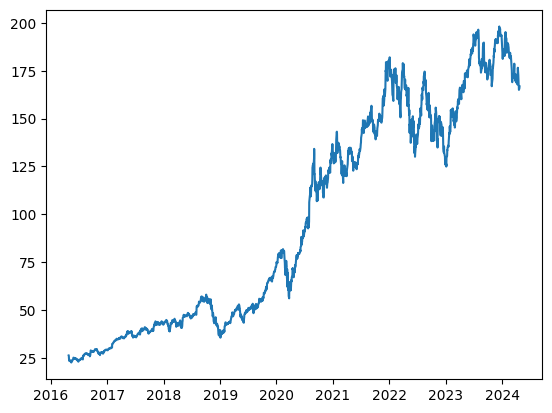

In [ ]:
plt.plot(data_f['Close'])

In [ ]:
data_m=pd.read_csv(File_Path)
data = data_m.loc[:,['Open','High','Low','Close','Adj Close','Volume']]
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,26.250000,26.412500,26.127501,26.270000,24.015160,112126400
1,25.977501,26.325001,25.977501,26.087500,23.848322,224064800
2,24.000000,24.677500,23.920000,24.455000,22.355942,458408400
3,24.402500,24.469999,23.562500,23.707500,21.672598,328970800
4,23.497499,23.680000,23.127501,23.434999,21.423492,274126000


**DATA RESCALING USING MIN-MAX NORMALIZATION**

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
print(scaled_data)

[[-1.24031805 -1.24270231 -1.23778619 -1.2405391  -1.24027631  0.05747868]
 [-1.24512021 -1.24422806 -1.24045667 -1.24375292 -1.24319332  2.06384735]
 [-1.27996905 -1.27295594 -1.27708679 -1.27250116 -1.26928621  6.26419021]
 ...
 [ 1.22615109  1.19829442  1.21821088  1.20248887  1.2247143  -0.73752177]
 [ 1.21399139  1.21329047  1.23049513  1.21728116  1.23940086 -1.08982787]
 [ 1.20940934  1.20840806  1.23334344  1.23486478  1.2568588  -1.37866187]]


In [ ]:
train_size=int(len(data)*0.8)
test_size=int(len(data)-train_size)
print(train_size, test_size)

1610 403


In [ ]:
train_data=scaled_data[0:train_size,:]
test_data=scaled_data[train_size:,:]
print(train_data)
print(test_data)

[[-1.24031805 -1.24270231 -1.23778619 -1.2405391  -1.24027631  0.05747868]
 [-1.24512021 -1.24422806 -1.24045667 -1.24375292 -1.24319332  2.06384735]
 [-1.27996905 -1.27295594 -1.27708679 -1.27250116 -1.26928621  6.26419021]
 ...
 [ 1.10948881  1.16097872  1.13311156  1.17484113  1.17306    -0.0710426 ]
 [ 1.1149518   1.09611212  1.0275384   1.00596179  1.00680807  0.24622055]
 [ 1.02489994  1.03612821  1.03181127  1.03184845  1.03229202 -0.3755798 ]]
[[ 1.02243278  1.00369491  0.99211019  0.98007515  0.98132389 -0.33048874]
 [ 0.96181102  0.93586403  0.93852236  0.95066657  0.95237308  0.95640348]
 [ 0.92832779  0.99183746  0.95151889  1.01723216  1.01790291 -0.49192719]
 ...
 [ 1.22615109  1.19829442  1.21821088  1.20248887  1.2247143  -0.73752177]
 [ 1.21399139  1.21329047  1.23049513  1.21728116  1.23940086 -1.08982787]
 [ 1.20940934  1.20840806  1.23334344  1.23486478  1.2568588  -1.37866187]]


In [ ]:
#CREATING THE TRAINING DATASET
n_days=60
X_train=[]
y_train=[]
for i in range (n_days,len(train_data)):
    X_train.append(train_data[i-n_days:i,:])
    y_train.append(train_data[i,3])

y_train=np.reshape(y_train,(len(y_train),1))
X_train, y_train= np.array(X_train),np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1550, 60, 6)
(1550, 1)


In [ ]:
#CREATING THE TESTING DATASET
n_days=60
X_test=[]
y_test=[]
for i in range (n_days,len(test_data)):
    X_test.append(test_data[i-n_days:i,:])
    y_test.append(test_data[i,3])

y_test=np.reshape(y_test,(len(y_test),1))
X_test, y_test= np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(343, 60, 6)
(343, 1)


**LSTM ARCHITECTURE DESIGN**

In [ ]:
model=keras.Sequential()
model.add(LSTM(128, activation='relu',return_sequences=True, input_shape=(X_train.shape[1],6)))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=False, activation='relu' ))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test,y_test),
    verbose=2
)

Epoch 1/50
25/25 - 11s - 450ms/step - accuracy: 0.0000e+00 - loss: 0.2478 - val_accuracy: 0.0000e+00 - val_loss: 0.7644
Epoch 2/50
25/25 - 5s - 180ms/step - accuracy: 0.0000e+00 - loss: 0.0514 - val_accuracy: 0.0000e+00 - val_loss: 0.0239
Epoch 3/50
25/25 - 5s - 193ms/step - accuracy: 0.0000e+00 - loss: 0.0096 - val_accuracy: 0.0000e+00 - val_loss: 0.0277
Epoch 4/50
25/25 - 7s - 279ms/step - accuracy: 0.0000e+00 - loss: 0.0068 - val_accuracy: 0.0000e+00 - val_loss: 0.0573
Epoch 5/50
25/25 - 8s - 331ms/step - accuracy: 0.0000e+00 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0440
Epoch 6/50
25/25 - 7s - 265ms/step - accuracy: 0.0000e+00 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0218
Epoch 7/50
25/25 - 4s - 178ms/step - accuracy: 0.0000e+00 - loss: 0.0059 - val_accuracy: 0.0000e+00 - val_loss: 0.0131
Epoch 8/50
25/25 - 5s - 208ms/step - accuracy: 0.0000e+00 - loss: 0.0056 - val_accuracy: 0.0000e+00 - val_loss: 0.0114
Epoch 9/50
25/25 - 6s - 224ms/step - accuracy: 

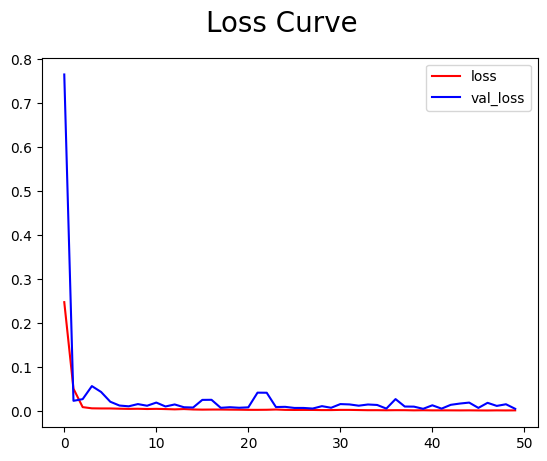

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss Curve', fontsize=20)
plt.legend(loc='upper right')
plt.show()

**MODEL TESTING**

In [ ]:
prediction=model.predict(X_test)
prediction_copies = np.repeat(prediction, data.shape[1], axis=-1)
prediction=scaler.inverse_transform(prediction_copies)[:,0]

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [ ]:
y_test_reshape = np.repeat(y_test, data.shape[1], axis=-1)
n_y_test=(scaler.inverse_transform(y_test_reshape)[:,0])

comparison=data_f['Close'][-(len(n_y_test)):]
prediction=np.reshape(prediction,(len(prediction),1))
comparison = pd.DataFrame(comparison)
comparison['Predicted Close Price']=prediction
comparison = comparison.rename(columns ={'Close':'Actual Close Price'})

In [ ]:
comparison

,Actual Close Price,Predicted Close Price
Date,,
2022-12-09,142.160004,146.188553
2022-12-12,144.490005,145.478058
2022-12-13,145.470001,145.397888
2022-12-14,143.210007,146.044662
2022-12-15,136.500000,146.198563
...,...,...
2024-04-17,168.000000,173.660843
2024-04-18,167.039993,172.204117
2024-04-19,165.000000,170.400696


In [ ]:
RMSE = np.sqrt(np.mean(comparison['Predicted Close Price']-comparison['Actual Close Price'])**2)
RMSE

np.float64(1.499774719618371)

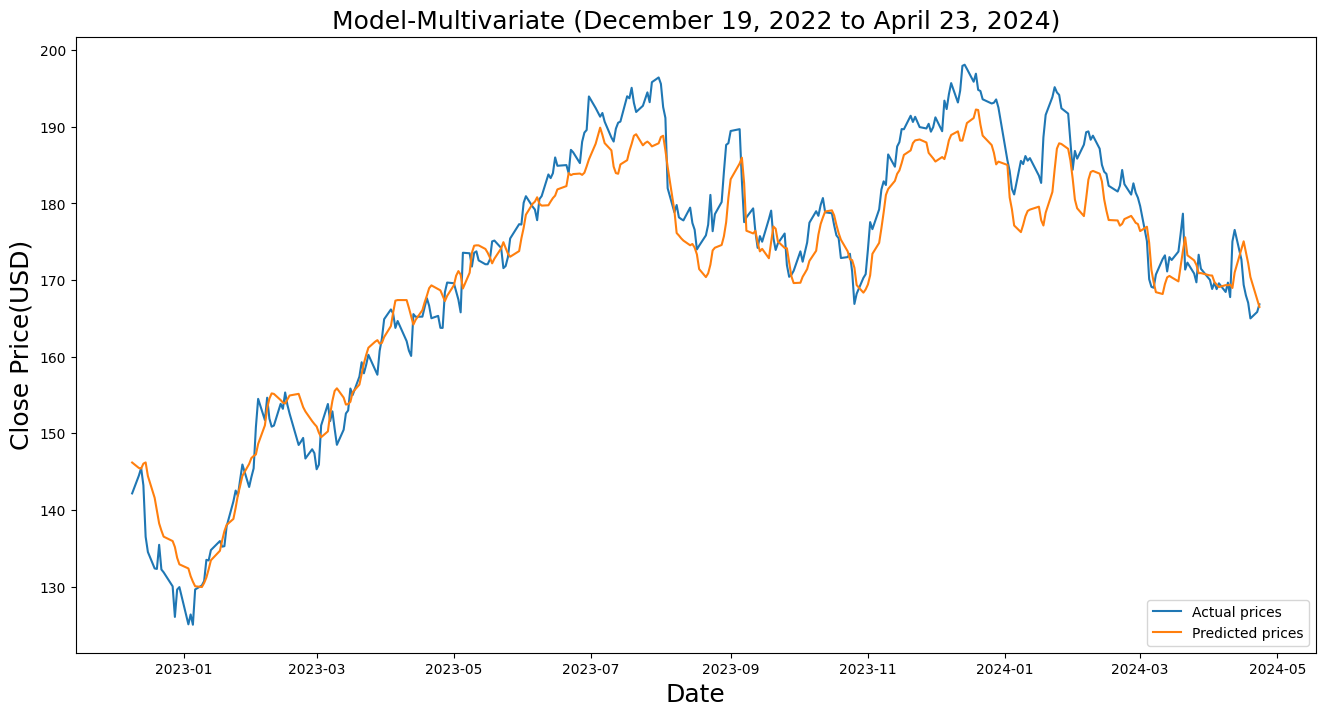

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model-Multivariate (December 19, 2022 to April 23, 2024)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(comparison['Actual Close Price'])
plt.plot(comparison['Predicted Close Price'])
plt.legend(['Actual prices', 'Predicted prices'], loc='lower right')

**SAVING THE MODEL FOR REPRODUCIBILITY OF THE SAME RESULT**

In [ ]:
my_model = (Saved_model_path)

In [ ]:
model.save(my_model)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model(my_model)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The value is RMSE 1.499774719618371


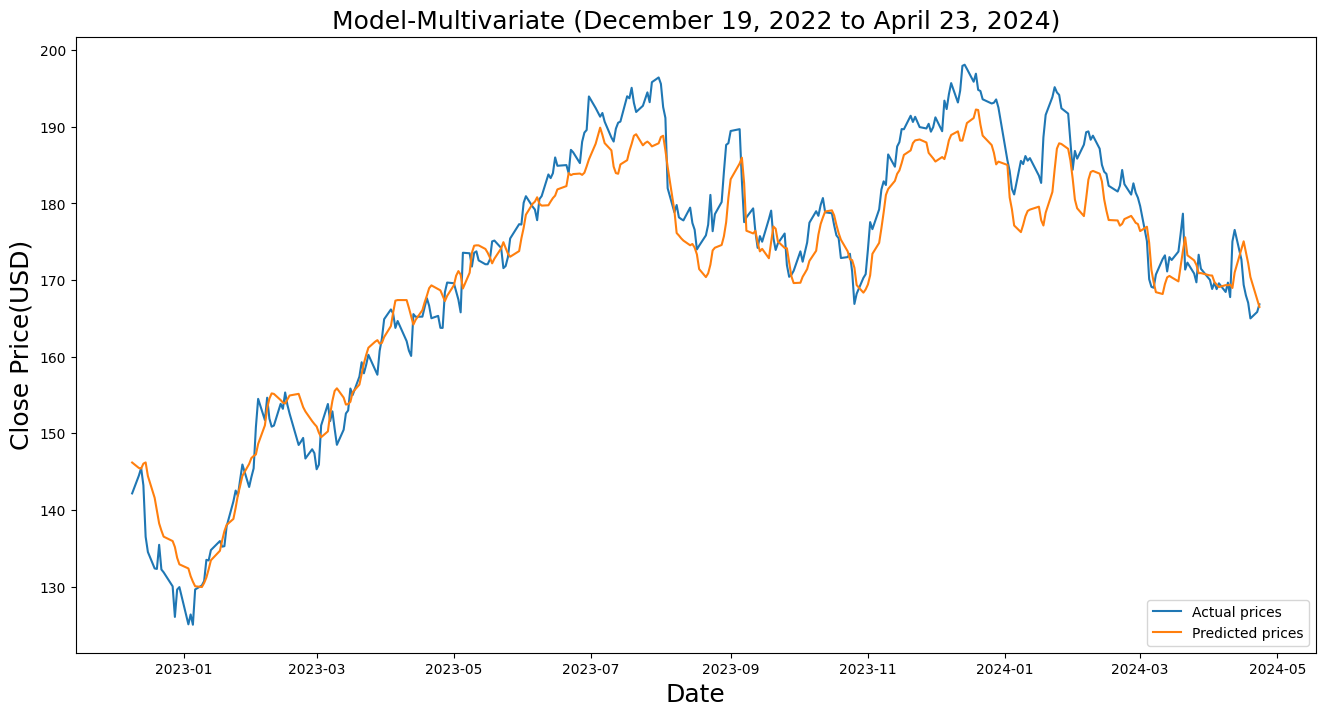

In [ ]:
prediction=loaded_model.predict(X_test)
prediction_copies = np.repeat(prediction, data.shape[1], axis=-1)
prediction=scaler.inverse_transform(prediction_copies)[:,0]

y_test_reshape = np.repeat(y_test, data.shape[1], axis=-1)
n_y_test=(scaler.inverse_transform(y_test_reshape)[:,0])
comparison=data_f['Close'][-(len(n_y_test)):]
prediction=np.reshape(prediction,(len(prediction),1))
comparison = pd.DataFrame(comparison)
comparison['Predicted Close Price']=prediction
comparison = comparison.rename(columns ={'Close':'Actual Close Price'})
RMSE = np.sqrt(np.mean(comparison['Predicted Close Price']-comparison['Actual Close Price'])**2)
print('The value is RMSE', RMSE)

plt.figure(figsize=(16,8))
plt.title('Model-Multivariate (December 19, 2022 to April 23, 2024)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(comparison['Actual Close Price'])
plt.plot(comparison['Predicted Close Price'])
plt.legend(['Actual prices', 'Predicted prices'], loc='lower right')